About the data

https://www.kaggle.com/jangot/ligue1-match-statistics/data

Match Statistics from top 5 European Leagues
Italy, Spain, England, Germany, France 2012-2017

by Jemilu Mohammed
last updated 3 months ago

In [46]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.svm import SVR


In [47]:
# read data from csv
fullStatDF = pd.read_csv("data/FootballEurope.csv", low_memory=False)
#fullStatDF.dtypes

In [48]:
# methods
def normalize(df):
    df_norm = df
    df_norm -= df_norm.min()
    df_norm /= df_norm.max() - df_norm.min()
    return df_norm


In [49]:
# filter data: specific manager and fields
managerNameKeyword = 'Mourinho'
fullStatSpecificManagerDF = fullStatDF[fullStatDF['homeManagerName'].str.contains(managerNameKeyword)]

fieldsInterestedHome = ['homeTackleSuccessFT', 'homePossessionFT', 'homePassesKeyFT', 'homePassSuccessFT', 'homeCornersTotalFT', 'homeAerialsTotalFT', 'homeDribblesWonFT', 'homeDispossessedFT', 'homeGoalFT']

specificFieldsSpecificManagerDF = fullStatSpecificManagerDF[fieldsInterestedHome]
specificFieldsSpecificManagerDF.dtypes

homeTackleSuccessFT    float64
homePossessionFT       float64
homePassesKeyFT          int64
homePassSuccessFT      float64
homeCornersTotalFT     float64
homeAerialsTotalFT       int64
homeDribblesWonFT      float64
homeDispossessedFT       int64
homeGoalFT               int64
dtype: object

In [50]:
# normalize data
normalizedDF = specificFieldsSpecificManagerDF.copy(deep=True)
normalizedDF = normalize(normalizedDF)

In [51]:
normalizedDF.head()

,homeTackleSuccessFT,homePossessionFT,homePassesKeyFT,homePassSuccessFT,homeCornersTotalFT,homeAerialsTotalFT,homeDribblesWonFT,homeDispossessedFT,homeGoalFT
387,0.777512,0.715817,0.090909,0.443792,0.222222,0.255814,0.222222,0.318182,0.666667
397,0.703947,0.709589,0.333333,0.554663,0.388889,0.860465,0.500000,0.500000,0.166667
421,0.645185,0.818221,0.272727,0.501544,0.277778,0.279070,0.277778,0.227273,0.500000
439,0.663278,1.000000,1.000000,0.846201,0.666667,0.767442,0.388889,0.272727,0.000000
447,0.631280,0.982184,0.454545,0.918777,0.222222,0.488372,0.555556,0.272727,0.000000


In [52]:
X = specificFieldsSpecificManagerDF.drop('homeGoalFT', axis=1)
Y = specificFieldsSpecificManagerDF[['homeGoalFT']]

print(X.shape)
print(Y.shape)

(84, 8)
(84, 1)


In [53]:
# Split data in training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.05)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(79, 8)
(5, 8)
(79, 1)
(5, 1)


C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


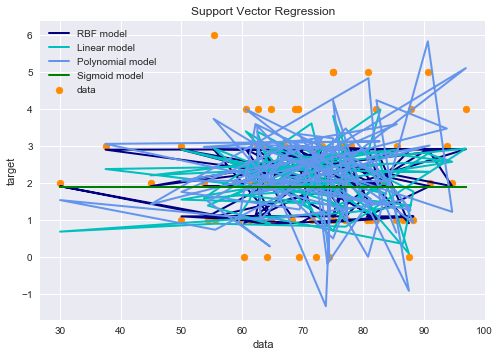

In [55]:
# Run multiple types of Support Vector Regressions at Once
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', degree=2)
svr_sigmoid = SVR(kernel='sigmoid', degree=5)
svr_precomputed = SVR(kernel='precomputedDNLM')
Y_pred_rbf = svr_rbf.fit(X_train, Y_train).predict(X_train)
Y_pred_lin = svr_lin.fit(X_train, Y_train).predict(X_train)
Y_pred_poly = svr_poly.fit(X_train, Y_train).predict(X_train)
Y_pred_sigmoid = svr_sigmoid.fit(X_train, Y_train).predict(X_train)

# Analyze results
lw = 2
plt.scatter(X_train['homeTackleSuccessFT'] , Y_train, color='darkorange', label='data')
plt.plot(X_train['homeTackleSuccessFT'], Y_pred_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_train['homeTackleSuccessFT'], Y_pred_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_train['homeTackleSuccessFT'], Y_pred_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.plot(X_train['homeTackleSuccessFT'], Y_pred_sigmoid, color='green', lw=lw, label='Sigmoid model')
#plt.plot(X, y_precomputed, color='purple', lw=lw, label='Precomputed model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()